In [1]:
#basics
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

#get census data
from cenpy import products

#spatial
import libpysal
import esda

#mapping/visualization
import geoplot
import mapclassify
from legendgram import legendgram
from palettable import colorbrewer

In [2]:
%matplotlib inline 

In [3]:
pip list

Package              Version
-------------------- ------------
affine               2.3.1
appnope              0.1.2
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.10.0
bleach               4.1.0
Bottleneck           1.3.4
brotlipy             0.7.0
Cartopy              0.18.0
cenpy                1.0.0.post4
certifi              2021.10.8
cffi                 1.15.0
charset-normalizer   2.0.4
click                7.1.2
click-plugins        1.1.1
cligj                0.7.2
contextily           1.2.0
cryptography         36.0.0
cycler               0.11.0
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.3
esda                 2.4.1
fastjsonschema       2.15.1
Fiona                1.8.13.post1
fonttools            4.25.0
fuzzywuzzy           0.18.0
GDAL                 3.0.2
geographiclib        1.52
geopandas            0.9.0
geoplot              

## read in geocoded addresses

In [4]:
# path to id table
path = ''

In [5]:
ids = pd.read_csv(f'{path}id_table_geocoded.csv', index_col=0)

In [6]:
ids.head()

,Loc_name,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,...,ID,Name,Street,City_1,State,Zip,index_sear,zip9,zip5,zip_plus4
FID,,,,,,,,,,,,,,,,,,,,,
0,World,M,98.44,A,"Crest Meadow Ln, Austin, Texas, 78748","Crest Meadow Ln, Austin, TX, 78748, USA",Crest Meadow Ln,StreetName,,,...,913064,"Abbott, Randall R",Crest Meadow,Austin,TX,78748-3942,98,787483942,78748,3942
1,World,T,100.00,A,"Interstate 35, Austin, Texas, 78753","Interstate 35, Austin, TX, 78753, USA",Interstate 35,StreetName,,,...,1841273,"ACEVEDO-PEREZ, VICTOR Alfonso",Interstate 35,Austin,TX,787532873,7,787532873,78753,2873
2,World,M,90.00,A,Transrent,"Transrent, Passeio Dom Luís I, 2750-411, Casca...",Transrent,POI,Rental Cars,Transrent,...,1095532,"Ackerson, James A",Transient,,,,8,0,0,0
3,World,M,98.00,A,"78767, Austin, Texas","78767, Austin, TX, USA",78767,Postal,,78767,...,1723990,"Aguilar, Cruz",P.O. Box 1000,Austin,TX,78767,20,0,78767,0
4,World,M,98.44,A,"Staggering Crk, San Antonio, Texas, 78254","Staggering Crk, San Antonio, TX, 78254, USA",Staggering Crk,StreetName,,,...,1708210,"Ahumada-Escobeda, Abraham",STAGGERING,SAN ANTONIO,TX,78254,24,0,78254,0


## check on data and quality of matches

In [7]:
ids.columns

Index(['Loc_name', 'Status', 'Score', 'Match_type', 'Match_addr', 'LongLabel',
       'ShortLabel', 'Addr_type', 'Type', 'PlaceName', 'Place_addr', 'Phone',
       'URL', 'Rank', 'AddBldg', 'AddNum', 'AddNumFrom', 'AddNumTo',
       'AddRange', 'Side', 'StPreDir', 'StPreType', 'StName', 'StType',
       'StDir', 'BldgType', 'BldgName', 'LevelType', 'LevelName', 'UnitType',
       'UnitName', 'SubAddr', 'StAddr', 'Block', 'Sector', 'Nbrhd', 'District',
       'City', 'MetroArea', 'Subregion', 'Region', 'RegionAbbr', 'Territory',
       'Zone', 'Postal', 'PostalExt', 'Country', 'CntryName', 'LangCode',
       'Distance', 'X', 'Y', 'DisplayX', 'DisplayY', 'Xmin', 'Xmax', 'Ymin',
       'Ymax', 'ExInfo', 'ARC_Addres', 'ARC_Addr_1', 'ARC_Addr_2',
       'ARC_Neighb', 'ARC_City', 'ARC_Subreg', 'ARC_Region', 'ARC_Postal',
       'ARC_Post_1', 'ARC_Countr', 'Field1', 'ID', 'Name', 'Street', 'City_1',
       'State', 'Zip', 'index_sear', 'zip9', 'zip5', 'zip_plus4'],
      dtype='object')

In [8]:
ids.shape[0]

36557

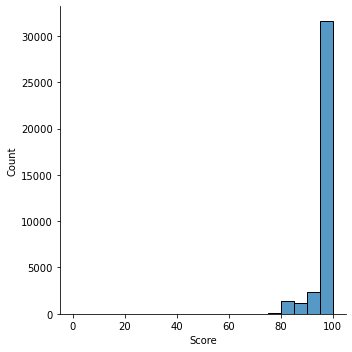

In [9]:
sns.displot(data=ids['Score'], bins=20)

In [10]:
ids['Addr_type'].unique()

array(['StreetName', 'POI', 'Postal', 'StreetAddress', 'PointAddress',
       ' ', 'PostalExt', 'Locality', 'PostalLoc', 'StreetAddressExt',
       'Subaddress', 'StreetInt'], dtype=object)

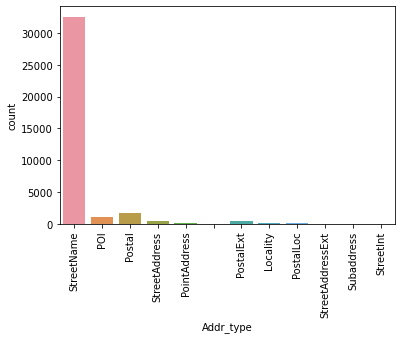

In [11]:
sns.countplot(data=ids, x='Addr_type')
plt.xticks(rotation=90)
plt.show()

In [12]:
ids[ids['Addr_type'] == 'StreetName'].shape[0]

32573

In [13]:
ids[ids['Addr_type'] == 'POI'].shape[0]

1006

In [14]:
ids[(ids['Addr_type'] == 'POI')&(ids['RegionAbbr']=='TX')]

,Loc_name,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,...,ID,Name,Street,City_1,State,Zip,index_sear,zip9,zip5,zip_plus4
FID,,,,,,,,,,,,,,,,,,,,,
17,World,M,100.0,A,Lakeline,"Lakeline, Lakeline Blvd, Cedar Park, TX, 78613...",Lakeline,POI,Park,Lakeline,...,1788879,"Abdelsahar, Mahmoud F",Lakeline,Cedar Park,TX,786131676,102,786131676,78613,1676
122,World,M,100.0,A,Kitty Hawk,"Kitty Hawk, 12000 E Loop 1604 N, Universal Cit...",Kitty Hawk,POI,Shopping Center,Kitty Hawk,...,2108154,"Adame, Michael",KITTY HAWK,UNIVERSAL CITY,TX,78148,251,0,78148,0
204,World,M,100.0,A,Lakeline,"Lakeline, Lakeline Blvd, Cedar Park, TX, 78613...",Lakeline,POI,Park,Lakeline,...,1784926,"Agreda, Billian R",Lakeline,Cedar Park,TX,786132018,358,786132018,78613,2018
315,World,M,100.0,A,Franklin Park,"Franklin Park, 4700 Cedargrove Dr, Austin, TX,...",Franklin Park,POI,Park,Franklin Park,...,1686109,"Aguilar-Sosa, Jose Carmen",Franklin Park,Austin,TX,787442935,502,787442935,78744,2935
358,World,M,100.0,A,Colony Park,"Colony Park, 7600 Loyola Ln, Austin, TX, 78724...",Colony Park,POI,Park,Colony Park,...,1718440,"Aguirre, Loreto Resa",Colony Park,Austin,TX,787243645,555,787243645,78724,3645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36309,World,M,100.0,A,Springdale,"Springdale, 1175 Nickols Ave, Austin, TX, 7872...",Springdale,POI,Garden,Springdale,...,2293231,"Juarez, Jacob Henry",Springdale,Austin,TX,787211941,22095,787211941,78721,1941
36423,World,M,100.0,A,Lakeline,"Lakeline, Lakeline Blvd, Cedar Park, TX, 78613...",Lakeline,POI,Park,Lakeline,...,2182504,"Matuszak II, James John",Lakeline,Cedar Park,TX,786131764,26926,786131764,78613,1764
36474,World,M,100.0,A,Sway,"Sway, 1417 S 1st St, Austin, TX, 78704, USA",Sway,POI,Bar or Pub,Sway,...,2291023,"Maya, Rafael Sandoval",SOUTHWAY,AUSTIN,TX,78704,26988,0,78704,0


## filter ids to good geocoded

In [15]:
# keep addresses that match street name or match POI in Texas

In [16]:
ids_matched = ids[(ids['Addr_type'] == 'StreetName')|
          ((ids['Addr_type'] == 'POI')&(ids['RegionAbbr']=='TX'))
         ]

In [17]:
ids_matched.shape

(32915, 80)

## convert to geodataframe

In [18]:
ids_geom = gpd.points_from_xy(ids_matched['X'],ids_matched['Y'], crs='epsg:4326')

In [19]:
ids_matched = gpd.GeoDataFrame(ids_matched, geometry=ids_geom)

<AxesSubplot:>

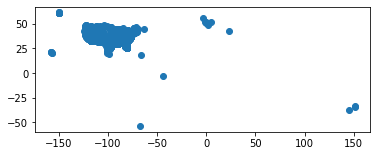

In [20]:
ids_matched.plot()

## read in Texas Census tracts

###### version 1: downloaded from Census/TIGER

In [21]:
texas_tracts = gpd.read_file('tl_2021_48_tract/tl_2021_48_tract.shp')

In [22]:
texas_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,029,181703,48029181703,1817.03,Census Tract 1817.03,G5020,S,3764552,2533,+29.5271515,-098.6523463,"POLYGON ((-98.66364 29.52305, -98.66362 29.523..."
1,48,029,181704,48029181704,1817.04,Census Tract 1817.04,G5020,S,5732875,11406,+29.5023002,-098.6345896,"POLYGON ((-98.64667 29.51503, -98.64662 29.515..."
2,48,029,181705,48029181705,1817.05,Census Tract 1817.05,G5020,S,4490895,0,+29.4806068,-098.6170515,"POLYGON ((-98.62996 29.48352, -98.62941 29.483..."
3,48,029,181711,48029181711,1817.11,Census Tract 1817.11,G5020,S,3743738,476,+29.5120429,-098.6494648,"POLYGON ((-98.66241 29.51902, -98.66031 29.519..."
4,48,029,181712,48029181712,1817.12,Census Tract 1817.12,G5020,S,1687802,0,+29.4930180,-098.6596257,"POLYGON ((-98.66609 29.48504, -98.66604 29.485..."


In [23]:
travis_tracts = texas_tracts[texas_tracts['COUNTYFP'] == '453']

<AxesSubplot:>

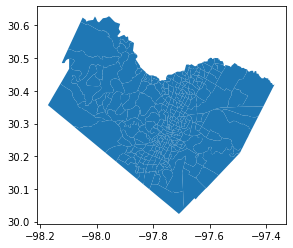

In [24]:
travis_tracts.plot()

In [25]:
travis_tracts = travis_tracts.to_crs('epsg:4326')

###### version 2: get shapes with cenpy/API

In [26]:
acs19 = products.ACS(2019)

In [27]:
travis_tracts, travis_bounds = acs19.from_county('Travis County, TX', 
                                   return_bounds=True)

/opt/anaconda3/envs/mapper2/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [28]:
travis_bounds = travis_bounds.to_crs('epsg:4326')
travis_tracts = travis_tracts.to_crs('epsg:4326')

<AxesSubplot:>

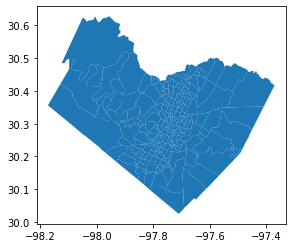

In [29]:
travis_tracts.plot()

## match ids to tracts

In [30]:
ids_with_tracts = gpd.sjoin(ids_matched, travis_tracts)

<AxesSubplot:xlabel='X', ylabel='Y'>

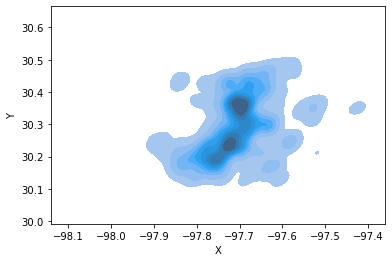

In [31]:
# heat map

sns.kdeplot(data=ids_with_tracts, x='X', y='Y', fill=True)

<AxesSubplot:>

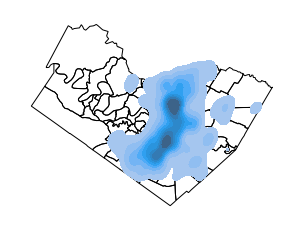

In [32]:
fig,ax = plt.subplots()

geoplot.kdeplot(ids_with_tracts, shade=True, ax=ax)
geoplot.polyplot(travis_tracts, ax=ax)

## summarize by tract

In [33]:
count_by_tract = ids_with_tracts.groupby('GEOID').count()['Loc_name'].rename('count of individuals with warrant record')

# read in census data

## explore/search for census data available

In [34]:
acs19 = products.ACS(2019)

In [35]:
# get total population

travis_acs19 = acs19.from_county('Travis,TX', 
                          level='tract', 
                          variables=['B01003_001E'])

/opt/anaconda3/envs/mapper2/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [36]:
travis_acs19

,GEOID,geometry,B01003_001E,NAME,state,county,tract
0,48453001779,"POLYGON ((-10913438.710 3557714.850, -10913435...",6546.0,"Census Tract 17.79, Travis County, Texas",48,453,001779
1,48453001778,"POLYGON ((-10907234.320 3550888.810, -10907174...",4339.0,"Census Tract 17.78, Travis County, Texas",48,453,001778
2,48453001740,"POLYGON ((-10894790.810 3528751.650, -10894759...",5017.0,"Census Tract 17.40, Travis County, Texas",48,453,001740
3,48453001729,"POLYGON ((-10891755.130 3528693.690, -10891525...",5075.0,"Census Tract 17.29, Travis County, Texas",48,453,001729
4,48453002423,"POLYGON ((-10889272.370 3525921.290, -10889122...",6007.0,"Census Tract 24.23, Travis County, Texas",48,453,002423
...,...,...,...,...,...,...,...
213,48453000306,"POLYGON ((-10877304.190 3542939.600, -10877297...",6029.0,"Census Tract 3.06, Travis County, Texas",48,453,000306
214,48453002201,"POLYGON ((-10872934.010 3545487.200, -10872900...",2223.0,"Census Tract 22.01, Travis County, Texas",48,453,002201
215,48453002319,"POLYGON ((-10870262.340 3529153.630, -10869731...",2368.0,"Census Tract 23.19, Travis County, Texas",48,453,002319
216,48453002207,"POLYGON ((-10871327.550 3532731.160, -10871307...",9940.0,"Census Tract 22.07, Travis County, Texas",48,453,002207


In [37]:
acs19.variables

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
AIANHH,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
AIHHTL,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
AIRES,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
ANRC,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
B01001A_001E,Estimate!!Total:,SEX BY AGE (WHITE ALONE),int,B01001A,0,NaN,NaN,"B01001A_001EA,B01001A_001M,B01001A_001MA",NaN
...,...,...,...,...,...,...,...,...,...
UA,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
ZCTA,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN


In [38]:
acs19.tables

,description,columns
table_name,,
B01001,SEX BY AGE,"[B01001_001E, B01001_002E, B01001_003E, B01001..."
B01002,MEDIAN AGE BY SEX,"[B01002_001E, B01002_002E, B01002_003E]"
B01003,TOTAL POPULATION,[B01003_001E]
B02001,RACE,"[B02001_001E, B02001_002E, B02001_003E, B02001..."
B02008,WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02008_001E]
...,...,...
C27014,PUBLIC HEALTH INSURANCE BY WORK EXPERIENCE,"[C27014_001E, C27014_002E, C27014_003E, C27014..."
C27016,HEALTH INSURANCE COVERAGE STATUS BY RATIO OF I...,"[C27016_001E, C27016_002E, C27016_003E, C27016..."
C27017,PRIVATE HEALTH INSURANCE BY RATIO OF INCOME TO...,"[C27017_001E, C27017_002E, C27017_003E, C27017..."


In [39]:
acs19.filter_tables('RACE', by='description')

,description,columns
table_name,,
B02001,RACE,"[B02001_001E, B02001_002E, B02001_003E, B02001..."
B02008,WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02008_001E]
B02009,BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINAT...,[B02009_001E]
B02010,AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN ...,[B02010_001E]
B02011,ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02011_001E]
B02012,NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALO...,[B02012_001E]
B02013,SOME OTHER RACE ALONE OR IN COMBINATION WITH O...,[B02013_001E]
B03002,HISPANIC OR LATINO ORIGIN BY RACE,"[B03002_001E, B03002_002E, B03002_003E, B03002..."
B25006,RACE OF HOUSEHOLDER,"[B25006_001E, B25006_002E, B25006_003E, B25006..."


In [40]:
acs19.filter_variables('B02001')

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B02001_009E,Estimate!!Total:!!Two or more races:!!Two race...,RACE,int,B02001,0,NaN,NaN,"B02001_009EA,B02001_009M,B02001_009MA",NaN
B02001_007E,Estimate!!Total:!!Some other race alone,RACE,int,B02001,0,NaN,NaN,"B02001_007EA,B02001_007M,B02001_007MA",NaN
B02001_008E,Estimate!!Total:!!Two or more races:,RACE,int,B02001,0,NaN,NaN,"B02001_008EA,B02001_008M,B02001_008MA",NaN
B02001_010E,Estimate!!Total:!!Two or more races:!!Two race...,RACE,int,B02001,0,NaN,NaN,"B02001_010EA,B02001_010M,B02001_010MA",NaN
B02001_002E,Estimate!!Total:!!White alone,RACE,int,B02001,0,NaN,NaN,"B02001_002EA,B02001_002M,B02001_002MA",NaN
B02001_001E,Estimate!!Total:,RACE,int,B02001,0,NaN,NaN,"B02001_001EA,B02001_001M,B02001_001MA",NaN
B02001_006E,Estimate!!Total:!!Native Hawaiian and Other Pa...,RACE,int,B02001,0,NaN,NaN,"B02001_006EA,B02001_006M,B02001_006MA",NaN
B02001_005E,Estimate!!Total:!!Asian alone,RACE,int,B02001,0,NaN,NaN,"B02001_005EA,B02001_005M,B02001_005MA",NaN
B02001_004E,Estimate!!Total:!!American Indian and Alaska N...,RACE,int,B02001,0,NaN,NaN,"B02001_004EA,B02001_004M,B02001_004MA",NaN
B02001_003E,Estimate!!Total:!!Black or African American alone,RACE,int,B02001,0,NaN,NaN,"B02001_003EA,B02001_003M,B02001_003MA",NaN


In [41]:
acs19.filter_variables('B03002')

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B03002_021E,Estimate!!Total:!!Hispanic or Latino:!!Two or ...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_021EA,B03002_021M,B03002_021MA",NaN
B03002_020E,Estimate!!Total:!!Hispanic or Latino:!!Two or ...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_020EA,B03002_020M,B03002_020MA",NaN
B03002_001E,Estimate!!Total:,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_001EA,B03002_001M,B03002_001MA",NaN
B03002_005E,Estimate!!Total:!!Not Hispanic or Latino:!!Ame...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_005EA,B03002_005M,B03002_005MA",NaN
B03002_004E,Estimate!!Total:!!Not Hispanic or Latino:!!Bla...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_004EA,B03002_004M,B03002_004MA",NaN
B03002_003E,Estimate!!Total:!!Not Hispanic or Latino:!!Whi...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_003EA,B03002_003M,B03002_003MA",NaN
B03002_002E,Estimate!!Total:!!Not Hispanic or Latino:,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_002EA,B03002_002M,B03002_002MA",NaN
B03002_009E,Estimate!!Total:!!Not Hispanic or Latino:!!Two...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_009EA,B03002_009M,B03002_009MA",NaN
B03002_007E,Estimate!!Total:!!Not Hispanic or Latino:!!Nat...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_007EA,B03002_007M,B03002_007MA",NaN
B03002_008E,Estimate!!Total:!!Not Hispanic or Latino:!!Som...,HISPANIC OR LATINO ORIGIN BY RACE,int,B03002,0,NaN,NaN,"B03002_008EA,B03002_008M,B03002_008MA",NaN


In [42]:
acs19.filter_tables('POVERTY', by='description')

,description,columns
table_name,,
B05010,RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 1...,"[B05010_001E, B05010_002E, B05010_003E, B05010..."
B06012,PLACE OF BIRTH BY POVERTY STATUS IN THE PAST 1...,"[B06012_001E, B06012_002E, B06012_003E, B06012..."
B07012,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY POVE...,"[B07012_001E, B07012_002E, B07012_003E, B07012..."
B07412,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY POVE...,"[B07412_001E, B07412_002E, B07412_003E, B07412..."
B08122,MEANS OF TRANSPORTATION TO WORK BY POVERTY STA...,"[B08122_001E, B08122_002E, B08122_003E, B08122..."
B08522,MEANS OF TRANSPORTATION TO WORK BY POVERTY STA...,"[B08522_001E, B08522_002E, B08522_003E, B08522..."
B10059,POVERTY STATUS IN THE PAST 12 MONTHS OF GRANDP...,"[B10059_001E, B10059_002E, B10059_003E, B10059..."
B13010,WOMEN 15 TO 50 YEARS WHO HAD A BIRTH IN THE PA...,"[B13010_001E, B13010_002E, B13010_003E, B13010..."
B14006,POVERTY STATUS IN THE PAST 12 MONTHS BY SCHOOL...,"[B14006_001E, B14006_002E, B14006_003E, B14006..."


In [43]:
acs19.filter_variables('B17001')

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B17001A_007E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001A,0,NaN,NaN,"B17001A_007EA,B17001A_007M,B17001A_007MA",NaN
B17001A_006E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001A,0,NaN,NaN,"B17001A_006EA,B17001A_006M,B17001A_006MA",NaN
B17001A_009E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001A,0,NaN,NaN,"B17001A_009EA,B17001A_009M,B17001A_009MA",NaN
B17001A_008E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001A,0,NaN,NaN,"B17001A_008EA,B17001A_008M,B17001A_008MA",NaN
B17001A_003E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001A,0,NaN,NaN,"B17001A_003EA,B17001A_003M,B17001A_003MA",NaN
...,...,...,...,...,...,...,...,...,...
B17001D_008E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001D,0,NaN,NaN,"B17001D_008EA,B17001D_008M,B17001D_008MA",NaN
B17001D_005E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001D,0,NaN,NaN,"B17001D_005EA,B17001D_005M,B17001D_005MA",NaN
B17001D_006E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001D,0,NaN,NaN,"B17001D_006EA,B17001D_006M,B17001D_006MA",NaN
B17001D_003E,Estimate!!Total:!!Income in the past 12 months...,POVERTY STATUS IN THE PAST 12 MONTHS BY SEX BY...,int,B17001D,0,NaN,NaN,"B17001D_003EA,B17001D_003M,B17001D_003MA",NaN


In [44]:
acs19.filter_tables('B2512')

,description,columns
table_name,,
B25120,AGGREGATE HOUSEHOLD INCOME IN THE PAST 12 MONT...,"[B25120_001E, B25120_002E, B25120_003E, B25120..."
B25121,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 201...,"[B25121_001E, B25121_002E, B25121_003E, B25121..."
B25122,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 201...,"[B25122_001E, B25122_002E, B25122_003E, B25122..."
B25123,TENURE BY SELECTED PHYSICAL AND FINANCIAL COND...,"[B25123_001E, B25123_002E, B25123_003E, B25123..."
B25124,TENURE BY HOUSEHOLD SIZE BY UNITS IN STRUCTURE,"[B25124_001E, B25124_002E, B25124_003E, B25124..."
B25125,TENURE BY AGE OF HOUSEHOLDER BY UNITS IN STRUC...,"[B25125_001E, B25125_002E, B25125_003E, B25125..."
B25126,TENURE BY AGE OF HOUSEHOLDER BY YEAR STRUCTURE...,"[B25126_001E, B25126_002E, B25126_003E, B25126..."
B25127,TENURE BY YEAR STRUCTURE BUILT BY UNITS IN STR...,"[B25127_001E, B25127_002E, B25127_003E, B25127..."
B25128,TENURE BY AGE OF HOUSEHOLDER BY YEAR HOUSEHOLD...,"[B25128_001E, B25128_002E, B25128_003E, B25128..."


In [45]:
acs19.filter_variables('B25064')

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B25064_001E,Estimate!!Median gross rent,MEDIAN GROSS RENT (DOLLARS),int,B25064,0,NaN,NaN,"B25064_001EA,B25064_001M,B25064_001MA",NaN


In [46]:
acs19.filter_variables('B25070')

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B25070_003E,Estimate!!Total:!!10.0 to 14.9 percent,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_003EA,B25070_003M,B25070_003MA",NaN
B25070_002E,Estimate!!Total:!!Less than 10.0 percent,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_002EA,B25070_002M,B25070_002MA",NaN
B25070_001E,Estimate!!Total:,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_001EA,B25070_001M,B25070_001MA",NaN
B25070_007E,Estimate!!Total:!!30.0 to 34.9 percent,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_007EA,B25070_007M,B25070_007MA",NaN
B25070_006E,Estimate!!Total:!!25.0 to 29.9 percent,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_006EA,B25070_006M,B25070_006MA",NaN
B25070_005E,Estimate!!Total:!!20.0 to 24.9 percent,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_005EA,B25070_005M,B25070_005MA",NaN
B25070_004E,Estimate!!Total:!!15.0 to 19.9 percent,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_004EA,B25070_004M,B25070_004MA",NaN
B25070_009E,Estimate!!Total:!!40.0 to 49.9 percent,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_009EA,B25070_009M,B25070_009MA",NaN
B25070_008E,Estimate!!Total:!!35.0 to 39.9 percent,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_008EA,B25070_008M,B25070_008MA",NaN
B25070_011E,Estimate!!Total:!!Not computed,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...,int,B25070,0,NaN,NaN,"B25070_011EA,B25070_011M,B25070_011MA",NaN


## pick variables and get data

In [47]:
acs_vars={'B01003_001E':'total population',
 'B02001_002E':'total: White',
 'B02001_003E':'total: Black',
 'B02001_005E':'total: Asian',
 'B02001_001E':'[denominator: total population for Race]',
 'B03002_012E':'total: Hispanic or Latino (any race)',
 'B03002_001E':'[denominator: total population for Hispanic or Latino]',
 'B17001_002E':'total: income below poverty level',
 'B17001_001E':'[denominator: total population for poverty]',
 'B25064_001E':'median gross rent',
 'B25070_010E': 'total: paying >50 percent of income on rent',
 'B25070_001E':'[denominator: total population for income on rent]'

}

In [48]:
travis_acs19 = acs19.from_county('Travis,TX', 
                          level='tract', 
                          variables=list(acs_vars.keys()))

/opt/anaconda3/envs/mapper2/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [49]:
travis_acs19

,GEOID,geometry,B01003_001E,B02001_001E,B02001_002E,B02001_003E,B02001_005E,B03002_001E,B03002_012E,B17001_001E,B17001_002E,B25064_001E,B25070_001E,B25070_010E,NAME,state,county,tract
0,48453001779,"POLYGON ((-10913438.710 3557714.850, -10913435...",6546.0,6546.0,6192.0,199.0,53.0,6546.0,1193.0,6462.0,283.0,1366.0,500.0,38.0,"Census Tract 17.79, Travis County, Texas",48,453,001779
1,48453001778,"POLYGON ((-10907234.320 3550888.810, -10907174...",4339.0,4339.0,4020.0,181.0,59.0,4339.0,378.0,4263.0,77.0,1580.0,437.0,124.0,"Census Tract 17.78, Travis County, Texas",48,453,001778
2,48453001740,"POLYGON ((-10894790.810 3528751.650, -10894759...",5017.0,5017.0,4067.0,214.0,501.0,5017.0,985.0,5017.0,219.0,1682.0,1051.0,112.0,"Census Tract 17.40, Travis County, Texas",48,453,001740
3,48453001729,"POLYGON ((-10891755.130 3528693.690, -10891525...",5075.0,5075.0,4272.0,19.0,480.0,5075.0,1631.0,5075.0,332.0,1362.0,1113.0,362.0,"Census Tract 17.29, Travis County, Texas",48,453,001729
4,48453002423,"POLYGON ((-10889272.370 3525921.290, -10889122...",6007.0,6007.0,5252.0,373.0,133.0,6007.0,2271.0,6007.0,478.0,1710.0,927.0,369.0,"Census Tract 24.23, Travis County, Texas",48,453,002423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,48453000306,"POLYGON ((-10877304.190 3542939.600, -10877297...",6029.0,6029.0,4602.0,396.0,623.0,6029.0,1162.0,6000.0,630.0,1588.0,1449.0,415.0,"Census Tract 3.06, Travis County, Texas",48,453,000306
214,48453002201,"POLYGON ((-10872934.010 3545487.200, -10872900...",2223.0,2223.0,779.0,851.0,8.0,2223.0,1117.0,2223.0,314.0,1383.0,325.0,155.0,"Census Tract 22.01, Travis County, Texas",48,453,002201
215,48453002319,"POLYGON ((-10870262.340 3529153.630, -10869731...",2368.0,2368.0,1176.0,636.0,40.0,2368.0,827.0,37.0,36.0,NaN,0.0,0.0,"Census Tract 23.19, Travis County, Texas",48,453,002319
216,48453002207,"POLYGON ((-10871327.550 3532731.160, -10871307...",9940.0,9940.0,3627.0,2287.0,66.0,9940.0,6561.0,9940.0,982.0,1522.0,493.0,128.0,"Census Tract 22.07, Travis County, Texas",48,453,002207


In [50]:
travis_acs19 = travis_acs19.to_crs('EPSG:4326')

In [51]:
travis_acs19 = travis_acs19.rename(columns=acs_vars)

## spatial join id records with census tracts and data

In [52]:
ids_with_tracts_and_data = gpd.sjoin(ids_matched, travis_acs19)

In [53]:
ids_with_tracts_and_data

,Loc_name,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,...,total: Hispanic or Latino (any race),[denominator: total population for poverty],total: income below poverty level,median gross rent,[denominator: total population for income on rent],total: paying >50 percent of income on rent,NAME,state,county,tract
FID,,,,,,,,,,,,,,,,,,,,,
0,World,M,98.44,A,"Crest Meadow Ln, Austin, Texas, 78748","Crest Meadow Ln, Austin, TX, 78748, USA",Crest Meadow Ln,StreetName,,,...,2625.0,8365.0,691.0,1866.0,396.0,92.0,"Census Tract 17.74, Travis County, Texas",48,453,001774
85,World,M,98.44,A,"Blairview Ln, Austin, Texas, 78748","Blairview Ln, Austin, TX, 78748, USA",Blairview Ln,StreetName,,,...,2625.0,8365.0,691.0,1866.0,396.0,92.0,"Census Tract 17.74, Travis County, Texas",48,453,001774
310,World,M,98.44,A,"Ralph C Craig Ln, Austin, Texas, 78748","Ralph C Craig Ln, Austin, TX, 78748, USA",Ralph C Craig Ln,StreetName,,,...,2625.0,8365.0,691.0,1866.0,396.0,92.0,"Census Tract 17.74, Travis County, Texas",48,453,001774
717,World,T,98.44,A,"Coats Cir, Austin, Texas, 78748","Coats Cir, Austin, TX, 78748, USA",Coats Cir,StreetName,,,...,2625.0,8365.0,691.0,1866.0,396.0,92.0,"Census Tract 17.74, Travis County, Texas",48,453,001774
893,World,M,98.44,A,"Eddie Egan Ln, Austin, Texas, 78748","Eddie Egan Ln, Austin, TX, 78748, USA",Eddie Egan Ln,StreetName,,,...,2625.0,8365.0,691.0,1866.0,396.0,92.0,"Census Tract 17.74, Travis County, Texas",48,453,001774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17353,World,T,98.44,A,"Timberline Rdg, Austin, Texas, 78746","Timberline Rdg, Austin, TX, 78746, USA",Timberline Rdg,StreetName,,,...,542.0,3945.0,16.0,2851.0,191.0,7.0,"Census Tract 19.19, Travis County, Texas",48,453,001919
23577,World,M,98.44,A,"Vale St, Austin, Texas, 78746","Vale St, Austin, TX, 78746, USA",Vale St,StreetName,,,...,542.0,3945.0,16.0,2851.0,191.0,7.0,"Census Tract 19.19, Travis County, Texas",48,453,001919
27949,World,M,98.44,A,"Brady Ln, Austin, Texas, 78746","Brady Ln, Austin, TX, 78746, USA",Brady Ln,StreetName,,,...,542.0,3945.0,16.0,2851.0,191.0,7.0,"Census Tract 19.19, Travis County, Texas",48,453,001919


## join census data to count of records by tract

In [54]:
count_by_tract

GEOID
48453000101     10
48453000102      9
48453000203     12
48453000204     53
48453000205     28
              ... 
48453002434     33
48453002435    216
48453002436    105
48453002500     24
48453980000     87
Name: count of individuals with warrant record, Length: 218, dtype: int64

In [55]:
count_by_tract.sum()

20621

In [56]:
tract_features = travis_acs19.merge(count_by_tract, on='GEOID')

<AxesSubplot:>

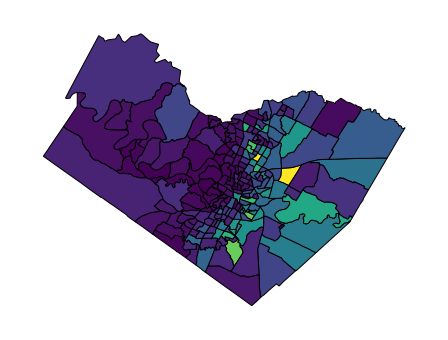

In [57]:
geoplot.choropleth(tract_features, 
                   hue='count of individuals with warrant record')

/opt/anaconda3/envs/mapper2/lib/python3.7/site-packages/geoplot/geoplot.py:57: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  'The data being passed to "hue" includes null values. You '


<AxesSubplot:>

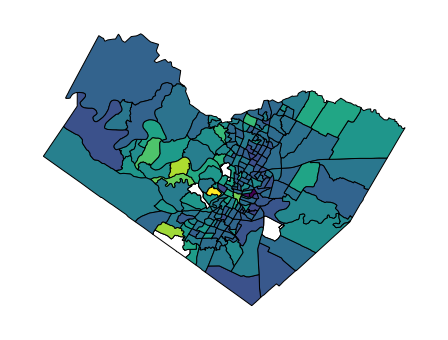

In [58]:
geoplot.choropleth(tract_features, 
                   hue='median gross rent')

<AxesSubplot:>

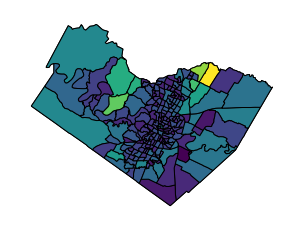

In [59]:
fig,ax = plt.subplots()

geoplot.choropleth(tract_features, 
                   hue='total population',
                   ax=ax
                  )
geoplot.polyplot(travis_bounds, ax=ax)

## compute prevalence

In [60]:
tract_features['warrant prevalence'] = tract_features['count of individuals with warrant record'] / tract_features['total population']

In [61]:
# for divide-by-zero problem: replace infinity with NaN
tract_features['warrant prevalence'].replace(np.inf, np.nan, inplace=True)

In [62]:
import mapclassify

<AxesSubplot:>

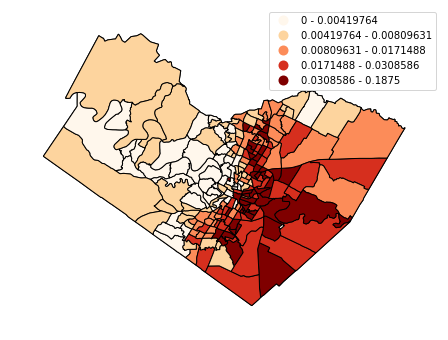

In [63]:
scheme = mapclassify.Quantiles(tract_features['warrant prevalence'].dropna())

ax = geoplot.choropleth(tract_features, 
                       hue='warrant prevalence',
                       scheme=scheme,
                       legend=True,
                       cmap='OrRd')

geoplot.polyplot(travis_bounds, ax=ax)

<AxesSubplot:>

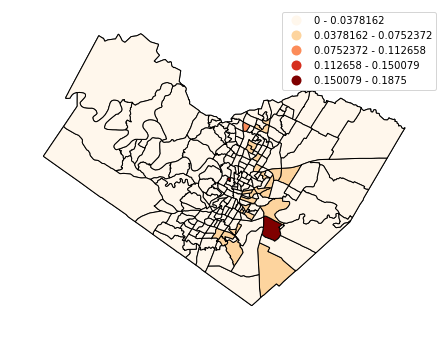

In [64]:
scheme = mapclassify.EqualInterval(tract_features['warrant prevalence'].dropna())

ax = geoplot.choropleth(tract_features, 
                       hue='warrant prevalence',
                       scheme=scheme,
                       legend=True,
                       cmap='OrRd')

geoplot.polyplot(travis_bounds, ax=ax)

/opt/anaconda3/envs/mapper2/lib/python3.7/site-packages/geoplot/geoplot.py:57: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  'The data being passed to "hue" includes null values. You '


<AxesSubplot:>

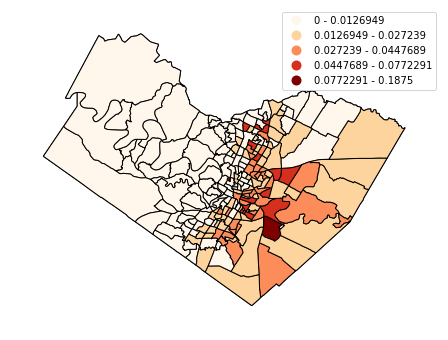

In [65]:
scheme = mapclassify.FisherJenks(tract_features['warrant prevalence'].dropna())

ax = geoplot.choropleth(tract_features, 
                       hue='warrant prevalence',
                       scheme=scheme,
                       legend=True,
                       cmap='OrRd')

geoplot.polyplot(travis_bounds, ax=ax)

<AxesSubplot:xlabel='warrant prevalence', ylabel='Count'>

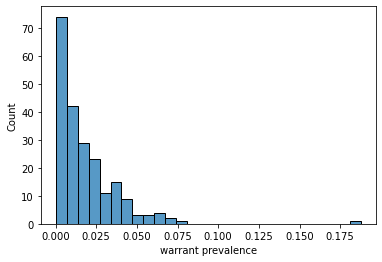

In [66]:
sns.histplot(tract_features['warrant prevalence'])

In [67]:
pal = colorbrewer.sequential.OrRd_5

/opt/anaconda3/envs/mapper2/lib/python3.7/site-packages/geoplot/geoplot.py:57: UserWarning: The data being passed to "hue" includes null values. You probably want to remove these before plotting this data with geoplot.
  'The data being passed to "hue" includes null values. You '


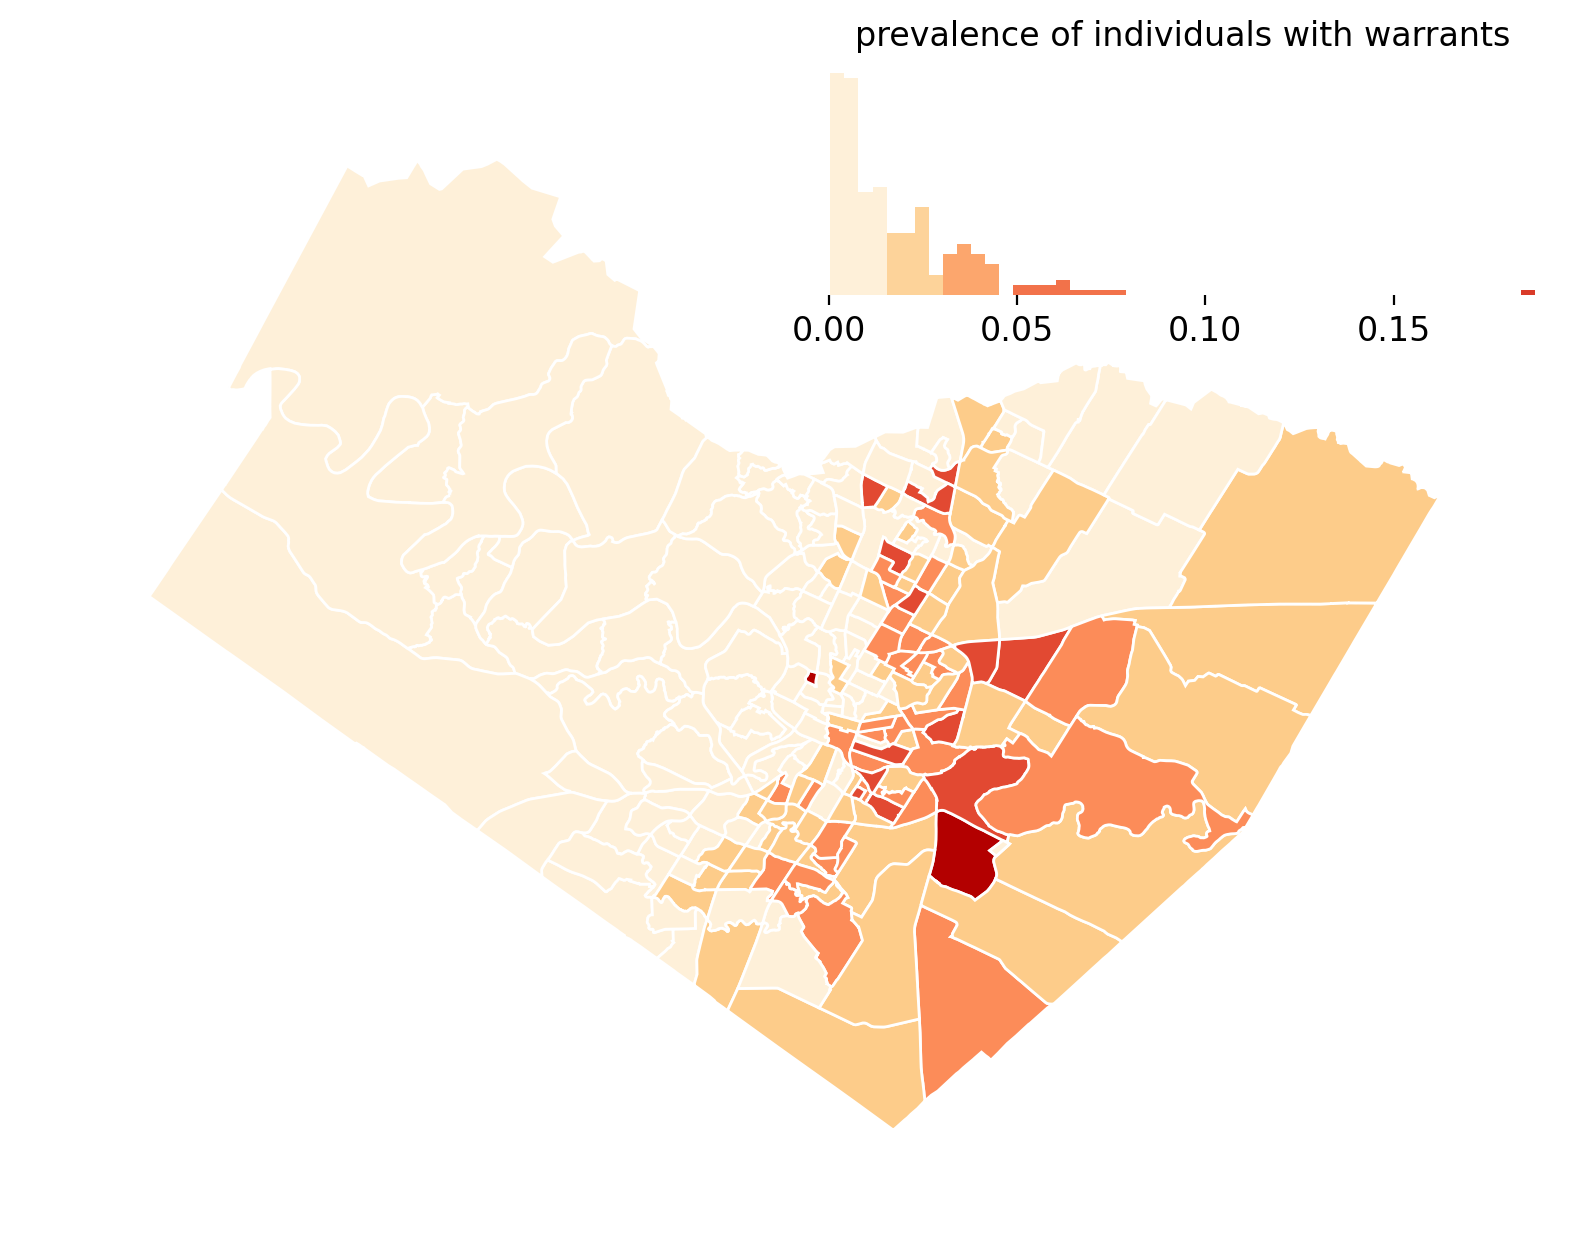

In [68]:
fig, ax = plt.subplots(figsize=(10,10), dpi=200)

geoplot.choropleth(tract_features, 
                   hue='warrant prevalence',
                   scheme=scheme,
                   cmap=pal.mpl_colormap,
                   edgecolor='white',
                   ax=ax)

hax = legendgram(fig,ax,
           tract_features['warrant prevalence'],
           breaks=scheme.bins,
           pal=pal,
           legend_size=(.5,.2), # legend size in fractions of the axis
           loc = 'upper right'
          )

plt.title('prevalence of individuals with warrants')

plt.show()

In [69]:
tract_features['warrant prevalence'].max()

0.1875

## save out data

In [ ]:
tract_features.to_file('tract_features.geojson', driver='GeoJSON')

In [ ]:
ids_with_tracts.to_file('ids_with_tracts.geojson', driver='GeoJSON')

In [ ]:
ids_with_tracts.to_csv('ids_with_tracts.csv')